#### LOGISTIC REGRESSION EXAMPLE (REGRESION LOGISTICA)

In [22]:
#Exportamos el modulo pandas 
import pandas as pd  

In [23]:
df=pd.read_csv("archive\Heart.csv") #leer el archivo csv 
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [24]:
df = df.drop(columns='Unnamed: 0') # eliminar la primera columna ya que solo es el indice de las filas 
df 

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [25]:
df['ChestPain']=df['ChestPain'].astype('category') # cambiar el tipo de elementos a categorias 
df['ChestPain']=df['ChestPain'].cat.codes #codificar estas categorias a numeros 

df['Thal']=df['Thal'].astype('category') # cambiar el tipo de elemento a categorias
df['Thal']=df['Thal'].cat.codes # codificar las categorias a numeros 

df['AHD']=df['AHD'].astype('category') # cambiar el tipo de elementos a categorias
df['AHD']=df['AHD'].cat.codes # codificar las categorias a numeros 

#df.isnull() # identifica si el elementos es nullo NaN Not a Number
df.isnull().sum() # suma todos los calores nulos en cada columna 


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [26]:
df=df.dropna() # elimina las filas que contengan valores nulos 
df.isnull().sum() #identifica los elementos y suma los nulos

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [27]:
# dividimos el datase en dos x(variables independientes) e y(variable dependientes ) 
X=df.drop(columns='AHD') # arreglo de variables independientes
print(X) 
y=df['AHD'] # variable dependiente
print(y)

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          3     145   233    1        2    150      0      2.3   
1     67    1          0     160   286    0        2    108      1      1.5   
2     67    1          0     120   229    0        2    129      1      2.6   
3     37    1          1     130   250    0        0    187      0      3.5   
4     41    0          2     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
297   57    0          0     140   241    0        0    123      1      0.2   
298   45    1          3     110   264    0        0    132      0      1.2   
299   68    1          0     144   193    1        0    141      0      3.4   
300   57    1          0     130   131    0        0    115      1      1.2   
301   57    0          2     130   236    0        2    174      0      0.0   

     Slope   Ca  Thal  
0        3  0.0     0  
1  

In [28]:
# dividir el dataset en dos, uno de entrenamiento y otro de testeo 
from sklearn.model_selection import train_test_split # importar funcion que permite dividir en dos tipos de dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [29]:
print(X_train)
print(X_test)

print(y_train)
print(y_test)


     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
290   67    1          1     152   212    0        2    150      0      0.8   
264   61    1          0     138   166    0        2    125      1      3.6   
197   45    0          0     138   236    0        2    152      1      0.2   
77    51    0          1     140   308    0        2    142      0      1.5   
15    57    1          1     150   168    0        0    174      0      1.6   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
189   69    1          1     140   254    0        2    146      0      2.0   
120   48    1          0     130   256    1        2    150      1      0.0   
48    65    0          1     140   417    1        2    157      0      0.8   
262   60    0          3     150   240    0        0    171      0      0.9   
209   62    0          0     150   244    0        0    154      1      1.4   

     Slope   Ca  Thal  
290      2  0.0     2  
264

In [30]:
from sklearn.preprocessing import StandardScaler # importar la clase de preprocesamiento que escalos los valores de los dataset dentro de una distribucion estandar
scaler = StandardScaler() # instanciar la clase con el nombre de scaler
X_train_scaled =scaler.fit_transform(X_train) # escalado de los valores de los datos de escalamiento
X_test_scaled =scaler.fit_transform(X_test) # escalado de los valores de los datos de escalamiento

# imprimen los valores escalados 
print(X_train_scaled) 
print(X_test_scaled)

[[ 1.38573367  0.67185481  0.21213203 ...  0.70792084 -0.70203785
   1.13274336]
 [ 0.71454401  0.67185481 -0.84347737 ...  0.70792084  0.36119339
  -0.49996949]
 [-1.07529507 -1.48841682 -0.84347737 ...  0.70792084 -0.70203785
  -0.49996949]
 ...
 [ 1.16200378 -1.48841682  0.21213203 ... -1.01249144  0.36119339
  -0.49996949]
 [ 0.60267907 -1.48841682  2.32335085 ... -1.01249144 -0.70203785
  -0.49996949]
 [ 0.82640895 -1.48841682 -0.84347737 ...  0.70792084 -0.70203785
  -0.49996949]]
[[-0.9102049  -1.3462912   0.06757374 ...  1.97949865 -0.75727937
  -0.52692446]
 [ 0.29126557  0.74278135 -0.94603233 ...  0.531085    0.3245483
   1.10835835]
 [-0.0364082   0.74278135 -0.94603233 ...  0.531085    0.3245483
   1.10835835]
 ...
 [-1.7840016   0.74278135  2.09478587 ...  0.531085   -0.75727937
   1.10835835]
 [ 2.14808356 -1.3462912   1.08117981 ... -0.91732864  0.3245483
  -0.52692446]
 [ 1.05583768 -1.3462912  -0.94603233 ...  0.531085    1.40637597
  -0.52692446]]


In [31]:
from sklearn.linear_model import LogisticRegression # importamos la clase del modelo de regression logistica 
log_reg = LogisticRegression(random_state=0) # instansiamos la clase definiendo el argumnento random_state igual a cero, para que el modelo producira los mismos resultados cada vez que se ejecute 
log_reg.fit(X_train_scaled,y_train) # entrenamos el modelo  con los valores de entrenamiento 
y_pred=log_reg.predict(X_test_scaled) # utilizamos la funcion ya entrenada, para predecir con los valores de entrenamiento  

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

85.55555555555556

<Figure size 800x600 with 0 Axes>

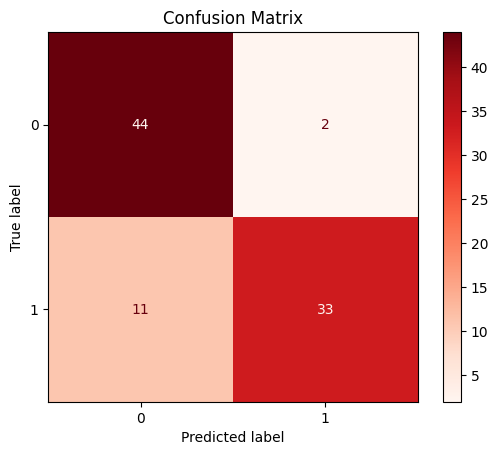

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix =confusion_matrix(y_test, y_pred) # Calculo de la matriz de confusión  
disp=ConfusionMatrixDisplay(conf_matrix, display_labels =['0','1']) # definicion matriz de confusion 
import matplotlib.pyplot as plt

# Grafica de la matriz de confusion 
plt.figure(figsize=(8,6)) 
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

